# Context:
Hello world, I am tring to do supervised learning to see if I can predict if a couple will match or nah

During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

### Load the data

In [80]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

In [81]:
pd.set_option('max_columns', 120)

In [82]:
df = pd.read_csv('Speed_Dating_Data.csv', encoding ='latin1')
df.head(10) # 8.3k rows

# df_columns = [df.columns]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,...,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.00,10.00,20.00,10.00,10.00,20.00,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,6,16.0,0,0.25,0,25.0,2.0,50.00,0.00,30.00,10.00,0.00,10.00,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,7,17.0,0,0.34,0,30.0,2.0,35.00,15.00,25.00,

In [83]:
df_columns = list(df.columns)
print(f'I have {len(df_columns)} columns')

I have 195 columns


## Data Cleaning

#### proper imputation with groupby age and gender to get median value of things lmao

In [84]:
#male = 1 , female = 0 I need to get the median age for each gender to impute the missing values
gendered = df.groupby('gender').median().reset_index()
gendered_age = gendered[['gender', 'age']]


df = pd.merge(df, gendered_age, on = 'gender', suffixes = ("", '_median'))
df.age.fillna(df.age_median, inplace = True)

df.drop('age_median', axis =1 , inplace = True)

print(f'I have {len(df.columns)} columns')
print(f'After imputing I have {len(df)} rows.')

I have 195 columns
After imputing I have 8378 rows.


In [85]:
# I know that the missing id is '22'

df.id.fillna(22, inplace = True)

In [86]:
#what columns do I need to impute? and how can i strategize?

for column in df.columns:
    if sum(df[str(column)].isnull()) != 0:
        print(f'{column} is missing {sum(df[str(column)].isnull())} rows')

positin1 is missing 1846 rows
pid is missing 10 rows
int_corr is missing 158 rows
age_o is missing 104 rows
race_o is missing 73 rows
pf_o_att is missing 89 rows
pf_o_sin is missing 89 rows
pf_o_int is missing 89 rows
pf_o_fun is missing 98 rows
pf_o_amb is missing 107 rows
pf_o_sha is missing 129 rows
attr_o is missing 212 rows
sinc_o is missing 287 rows
intel_o is missing 306 rows
fun_o is missing 360 rows
amb_o is missing 722 rows
shar_o is missing 1076 rows
like_o is missing 250 rows
prob_o is missing 318 rows
met_o is missing 385 rows
field is missing 63 rows
field_cd is missing 82 rows
undergra is missing 3464 rows
mn_sat is missing 5245 rows
tuition is missing 4795 rows
race is missing 63 rows
imprace is missing 79 rows
imprelig is missing 79 rows
from is missing 79 rows
zipcode is missing 1064 rows
income is missing 4099 rows
goal is missing 79 rows
date is missing 97 rows
go_out is missing 79 rows
career is missing 89 rows
career_c is missing 138 rows
sports is missing 79 rows

In [87]:
#pid is missing 10 rows. I want to look at which rows of the df that is bc this is a pivot axis for imputing
#exploring the data led me to conclude that all of them are missing pid 118 whom was NOT a participant

# i have to drop these rows because they technically dont exist????? lmao

print(f'Prior to drop I had {len(df)} rows.')
df.drop(df[df.pid.isnull()].index, inplace = True)
print(f'After drop I have {len(df)} rows.')

Prior to drop I had 8378 rows.
After drop I have 8368 rows.


In [88]:
# so for each age and gender I will have the median values for columns to impute
gender_age = df.groupby(['gender', 'age']).median().reset_index()
gender_age.head(20)

#let's start imputing
imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))


#here are the values that I'm interested in imputing
personal_pref = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
index = list(range(1, len(personal_pref) + 1))

personal_dict = dict(zip(index, personal_pref))

for index, feature in personal_dict.items():
    replace = feature + '_median'
    #print(feature, replace)
    #break
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[str(feature)].fillna(imputing[str(replace)], inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    
#need to drop the median values from the imputing df
features = [c for c in imputing.columns if '_median' in c]

df = imputing.drop(features, axis = 1)
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')

Before imputing attr1_1 had 79 missing rows
After imputing attr1_1 had 0 missing rows 

Before imputing sinc1_1 had 79 missing rows
After imputing sinc1_1 had 0 missing rows 

Before imputing intel1_1 had 79 missing rows
After imputing intel1_1 had 0 missing rows 

Before imputing fun1_1 had 88 missing rows
After imputing fun1_1 had 0 missing rows 

Before imputing amb1_1 had 97 missing rows
After imputing amb1_1 had 0 missing rows 

Before imputing shar1_1 had 119 missing rows
After imputing shar1_1 had 0 missing rows 

After drop I have 195 columns.
After imputing I have 8368 rows.


Let's tackle this piece by piece. I want to start imputing by each person's preferences.

In [89]:
#here is where I'm imputing
partner_pref = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
iid_pref = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
index = list(range(1, len(iid_pref) + 1))


personal_dict = dict(zip(index, iid_pref))
partner_dict = dict(zip(index, partner_pref))

#print(personal_dict, partner_dict)

subset = df[['iid','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
grouped_iid = subset.groupby('iid').median().reset_index()

imputing = pd.merge(df, grouped_iid, left_on = 'pid', right_on = 'iid', suffixes = ('', '_by_iid'))

for index, feature in partner_dict.items():
    replace = str(personal_dict[index]) + '_by_iid'
    print(feature, replace)
    #break
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[str(feature)].fillna(imputing[str(replace)], inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    
features = [c for c in imputing.columns if '_by_iid' in c]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')

pf_o_att attr1_1_by_iid
Before imputing pf_o_att had 79 missing rows
After imputing pf_o_att had 0 missing rows 

pf_o_sin sinc1_1_by_iid
Before imputing pf_o_sin had 79 missing rows
After imputing pf_o_sin had 0 missing rows 

pf_o_int intel1_1_by_iid
Before imputing pf_o_int had 79 missing rows
After imputing pf_o_int had 0 missing rows 

pf_o_fun fun1_1_by_iid
Before imputing pf_o_fun had 88 missing rows
After imputing pf_o_fun had 0 missing rows 

pf_o_amb amb1_1_by_iid
Before imputing pf_o_amb had 97 missing rows
After imputing pf_o_amb had 0 missing rows 

pf_o_sha shar1_1_by_iid
Before imputing pf_o_sha had 119 missing rows
After imputing pf_o_sha had 0 missing rows 

Before drop I have 202 columns.
Here are the columns that I dropped: ['iid_by_iid', 'attr1_1_by_iid', 'sinc1_1_by_iid', 'intel1_1_by_iid', 'fun1_1_by_iid', 'amb1_1_by_iid', 'shar1_1_by_iid'] 

After drop I have 195 columns.
After imputing I have 8368 rows.


One step at a time. Next, I want to tackle the ratings of each activity. I will impute these values with the gender+age median values.

Recall that I still have the df gender_age

In [90]:
gender_age

imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))

activities = ['exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 
             'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'sports', 'tvsports',
              'exphappy', 'expnum','goal', 'race', 'imprace', 'imprelig', 'date', 'go_out']
index = list(range(1, len(activities) + 1))

act_dict = dict(zip(index, activities))

for index, act in act_dict.items():
    replace = act + '_median'
    print(act, replace)
    #break
    print(index, f'column i am imputing on: {act}, replacement {replace}')
    print(f'Before imputing {act} had {sum(imputing[str(act)].isnull())} missing rows')
    imputing[str(act)].fillna(imputing[str(replace)], inplace = True)
    # if not there im just going to impute with the median value from dataset
    imputing[str(act)].fillna(imputing[str(act)].median(), inplace = True)
    print(f'After imputing {act} had {sum(imputing[str(act)].isnull())} missing rows \n')
    

    
features = [c for c in imputing.columns if '_median' in c]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')

exercise exercise_median
1 column i am imputing on: exercise, replacement exercise_median
Before imputing exercise had 79 missing rows
After imputing exercise had 0 missing rows 

dining dining_median
2 column i am imputing on: dining, replacement dining_median
Before imputing dining had 79 missing rows
After imputing dining had 0 missing rows 

museums museums_median
3 column i am imputing on: museums, replacement museums_median
Before imputing museums had 79 missing rows
After imputing museums had 0 missing rows 

art art_median
4 column i am imputing on: art, replacement art_median
Before imputing art had 79 missing rows
After imputing art had 0 missing rows 

hiking hiking_median
5 column i am imputing on: hiking, replacement hiking_median
Before imputing hiking had 79 missing rows
After imputing hiking had 0 missing rows 

gaming gaming_median
6 column i am imputing on: gaming, replacement gaming_median
Before imputing gaming had 79 missing rows
After imputing gaming had 0 missing

First, I have to impute the values from time_1

In [91]:
time_1 = list(c for c in df.columns if '_1' in c)

imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))

for feature in time_1:
    replace = feature + '_median'
    print(feature, replace)
    #break
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[feature].fillna(imputing[replace], inplace = True)
    # if not there im just going to impute with the median value from dataset
    imputing[feature].fillna(imputing[feature].median(), inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    #break
    

    
features = [c for c in imputing.columns if '_median' in c]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')

attr1_1 attr1_1_median
Before imputing attr1_1 had 0 missing rows
After imputing attr1_1 had 0 missing rows 

sinc1_1 sinc1_1_median
Before imputing sinc1_1 had 0 missing rows
After imputing sinc1_1 had 0 missing rows 

intel1_1 intel1_1_median
Before imputing intel1_1 had 0 missing rows
After imputing intel1_1 had 0 missing rows 

fun1_1 fun1_1_median
Before imputing fun1_1 had 0 missing rows
After imputing fun1_1 had 0 missing rows 

amb1_1 amb1_1_median
Before imputing amb1_1 had 0 missing rows
After imputing amb1_1 had 0 missing rows 

shar1_1 shar1_1_median
Before imputing shar1_1 had 0 missing rows
After imputing shar1_1 had 0 missing rows 

attr4_1 attr4_1_median
Before imputing attr4_1 had 1879 missing rows
After imputing attr4_1 had 0 missing rows 

sinc4_1 sinc4_1_median
Before imputing sinc4_1 had 1879 missing rows
After imputing sinc4_1 had 0 missing rows 

intel4_1 intel4_1_median
Before imputing intel4_1 had 1879 missing rows
After imputing intel4_1 had 0 missing rows 

f

Next Challenge: I want to impute the values at time s with time 1_1 values

In [92]:
time_s = [c for c in df.columns if ("1_s" in c or '3_s' in c)]
time_1 = []

for feat in time_s:
    replace = feat.replace('_s', "_1")
    time_1.append(replace)

    
index = list(range(1, len(time_s) + 1))

time_1_dict = dict(zip(index, time_1))
time_s_dict = dict(zip(index, time_s))

print(time_s_dict, time_1_dict)

for index, feature in time_s_dict.items():
    #replace = str(personal_dict[index]) + '_by_iid'
    #print(feature, replace)
    #break
    replace = time_1_dict[index]
    #print(feature, replace)
    #break
    print(index)
    print(f'Before imputing {feature} had {sum(df[str(feature)].isnull())} missing rows')
    df[str(feature)].fillna(df[str(replace)], inplace = True)
    df[str(feature)].fillna(df[str(feature)].median(), inplace = True)
    print(f'After imputing {feature} had {sum(df[str(feature)].isnull())} missing rows \n')
    

print(f'After imputing I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')

{1: 'attr1_s', 2: 'sinc1_s', 3: 'intel1_s', 4: 'fun1_s', 5: 'amb1_s', 6: 'shar1_s', 7: 'attr3_s', 8: 'sinc3_s', 9: 'intel3_s', 10: 'fun3_s', 11: 'amb3_s'} {1: 'attr1_1', 2: 'sinc1_1', 3: 'intel1_1', 4: 'fun1_1', 5: 'amb1_1', 6: 'shar1_1', 7: 'attr3_1', 8: 'sinc3_1', 9: 'intel3_1', 10: 'fun3_1', 11: 'amb3_1'}
1
Before imputing attr1_s had 4272 missing rows
After imputing attr1_s had 0 missing rows 

2
Before imputing sinc1_s had 4272 missing rows
After imputing sinc1_s had 0 missing rows 

3
Before imputing intel1_s had 4272 missing rows
After imputing intel1_s had 0 missing rows 

4
Before imputing fun1_s had 4272 missing rows
After imputing fun1_s had 0 missing rows 

5
Before imputing amb1_s had 4272 missing rows
After imputing amb1_s had 0 missing rows 

6
Before imputing shar1_s had 4272 missing rows
After imputing shar1_s had 0 missing rows 

7
Before imputing attr3_s had 4368 missing rows
After imputing attr3_s had 0 missing rows 

8
Before imputing sinc3_s had 4368 missing rows


I want to work on time 2. I will be imputing the values from the median of the gender+age, and if not present i will impute with the dataset median

In [93]:
time_2 = [c for c in df.columns if ("_2" in c)]

imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))

for feature in time_2:
    replace = feature + '_median'
    print(feature, replace)
    #break
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[feature].fillna(imputing[replace], inplace = True)
    # if not there im just going to impute with the median value from dataset
    imputing[feature].fillna(imputing[feature].median(), inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    #break
    

    
features = [c for c in imputing.columns if '_median' in c]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')


satis_2 satis_2_median
Before imputing satis_2 had 914 missing rows
After imputing satis_2 had 0 missing rows 

numdat_2 numdat_2_median
Before imputing numdat_2 had 944 missing rows
After imputing numdat_2 had 0 missing rows 

attr7_2 attr7_2_median
Before imputing attr7_2 had 6384 missing rows
After imputing attr7_2 had 0 missing rows 

sinc7_2 sinc7_2_median
Before imputing sinc7_2 had 6413 missing rows
After imputing sinc7_2 had 0 missing rows 

intel7_2 intel7_2_median
Before imputing intel7_2 had 6384 missing rows
After imputing intel7_2 had 0 missing rows 

fun7_2 fun7_2_median
Before imputing fun7_2 had 6384 missing rows
After imputing fun7_2 had 0 missing rows 

amb7_2 amb7_2_median
Before imputing amb7_2 had 6413 missing rows
After imputing amb7_2 had 0 missing rows 

shar7_2 shar7_2_median
Before imputing shar7_2 had 6394 missing rows
After imputing shar7_2 had 0 missing rows 

attr1_2 attr1_2_median
Before imputing attr1_2 had 932 missing rows
After imputing attr1_2 had 0 m

Time for time 3

In [94]:
time_3 = [c for c in df.columns if ("_3" in c)]

imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))

for feature in time_3:
    replace = feature + '_median'
    print(feature, replace)
    #break
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[feature].fillna(imputing[replace], inplace = True)
    # if not there im just going to impute with the median value from dataset
    imputing[feature].fillna(imputing[feature].median(), inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    #break
    

    
features = [c for c in imputing.columns if '_median' in c]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')


date_3 date_3_median
Before imputing date_3 had 4399 missing rows
After imputing date_3 had 0 missing rows 

numdat_3 numdat_3_median
Before imputing numdat_3 had 6872 missing rows
After imputing numdat_3 had 0 missing rows 

num_in_3 num_in_3_median
Before imputing num_in_3 had 7702 missing rows
After imputing num_in_3 had 0 missing rows 

attr1_3 attr1_3_median
Before imputing attr1_3 had 4399 missing rows
After imputing attr1_3 had 0 missing rows 

sinc1_3 sinc1_3_median
Before imputing sinc1_3 had 4399 missing rows
After imputing sinc1_3 had 0 missing rows 

intel1_3 intel1_3_median
Before imputing intel1_3 had 4399 missing rows
After imputing intel1_3 had 0 missing rows 

fun1_3 fun1_3_median
Before imputing fun1_3 had 4399 missing rows
After imputing fun1_3 had 0 missing rows 

amb1_3 amb1_3_median
Before imputing amb1_3 had 4399 missing rows
After imputing amb1_3 had 0 missing rows 

shar1_3 shar1_3_median
Before imputing shar1_3 had 4399 missing rows
After imputing shar1_3 had 

In [95]:
# let's get an update of all the columns I have to impute


for column in df.columns:
    if sum(df[str(column)].isnull()) != 0:
        print(f'{column} is missing {sum(df[str(column)].isnull())} rows')

positin1 is missing 1836 rows
int_corr is missing 158 rows
age_o is missing 94 rows
race_o is missing 63 rows
attr_o is missing 202 rows
sinc_o is missing 277 rows
intel_o is missing 296 rows
fun_o is missing 350 rows
amb_o is missing 712 rows
shar_o is missing 1066 rows
like_o is missing 240 rows
prob_o is missing 308 rows
met_o is missing 375 rows
field is missing 63 rows
field_cd is missing 82 rows
undergra is missing 3454 rows
mn_sat is missing 5235 rows
tuition is missing 4785 rows
from is missing 79 rows
zipcode is missing 1063 rows
income is missing 4095 rows
career is missing 89 rows
career_c is missing 138 rows
attr is missing 202 rows
sinc is missing 277 rows
intel is missing 296 rows
fun is missing 350 rows
amb is missing 712 rows
shar is missing 1066 rows
like is missing 240 rows
prob is missing 308 rows
met is missing 375 rows
match_es is missing 1173 rows
length is missing 914 rows
you_call is missing 4399 rows
them_cal is missing 4399 rows


I want to tackle the missing ratings. Let's start by comparing the pid of the missing ratings from partners, and the iid of the missing ratings of others.

Let's do the age and race of the partner

In [96]:
subset = df.groupby('iid')['race', 'age'].median().reset_index()
# subset.head()

features = ['race_o', 'age_o']
match = ['race_by_iid', 'age_by_iid']
index = list(range(len(features)))

features_dict = dict(zip(index, features))
match_dict = dict(zip(index, match))


imputing = pd.merge(df, subset, left_on = 'pid', right_on = 'iid', suffixes = ('', '_by_iid'))
for index, feature in features_dict.items():
    replace = match[index]
    print(feature, replace)
    #break
    print(f'{feature} is missing {sum(imputing[str(feature)].isnull())} rows')
    imputing[str(feature)].fillna(imputing[str(replace)], inplace = True)
    imputing[str(feature)].fillna(imputing[str(feature)], inplace = True)
    print(f'{feature} is missing {sum(imputing[str(feature)].isnull())} rows')
    #break
    #imputing[feature].fillna(imputing[])
    
features = [c for c in imputing.columns if '_by_iid' in c]
df = imputing.drop(features, axis = 1)
df.shape

race_o race_by_iid
race_o is missing 63 rows
race_o is missing 0 rows
age_o age_by_iid
age_o is missing 94 rows
age_o is missing 0 rows


(8368, 195)

In [97]:
#got confirmation that this is the same people

# get_pid = set(df.loc[df['attr_o'].isnull()]['pid'].unique())
# get_pid #this is a list of pid who we dont have ratings from

# get_iid = set(df.loc[df['attr'].isnull()]['iid'].unique())
# get_iid

# get_iid - get_pid
# get_pid - get_iid




#this means that I should impute the missing data. I think a good way would be to get the median rating of each person
how_rated_by_others = ['attr_o','sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o']


subset = df.groupby('iid')[how_rated_by_others].median().reset_index() #median rating of each attribute for each person

#so what if these people aren't rated? then I would just w
imputing = pd.merge(df, subset, left_on = 'iid', right_on = 'iid', suffixes = ('', '_by_iid'))
imputing = pd.merge(imputing, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))

for feature in how_rated_by_others:
    by_iid = feature + '_by_iid'
    by_median = feature + "_median"
    print(feature, by_iid, by_median)
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[feature].fillna(imputing[by_iid], inplace = True)
    # if not there im just going to impute with the median value from dataset
    imputing[feature].fillna(imputing[by_median], inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    #break
    #break
    

    
features = [c for c in imputing.columns if ('_median' in c or '_by_iid' in c)]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')


attr_o attr_o_by_iid attr_o_median
Before imputing attr_o had 202 missing rows
After imputing attr_o had 0 missing rows 

sinc_o sinc_o_by_iid sinc_o_median
Before imputing sinc_o had 277 missing rows
After imputing sinc_o had 0 missing rows 

intel_o intel_o_by_iid intel_o_median
Before imputing intel_o had 296 missing rows
After imputing intel_o had 0 missing rows 

fun_o fun_o_by_iid fun_o_median
Before imputing fun_o had 350 missing rows
After imputing fun_o had 0 missing rows 

amb_o amb_o_by_iid amb_o_median
Before imputing amb_o had 712 missing rows
After imputing amb_o had 0 missing rows 

shar_o shar_o_by_iid shar_o_median
Before imputing shar_o had 1066 missing rows
After imputing shar_o had 0 missing rows 

like_o like_o_by_iid like_o_median
Before imputing like_o had 240 missing rows
After imputing like_o had 0 missing rows 

prob_o prob_o_by_iid prob_o_median
Before imputing prob_o had 308 missing rows
After imputing prob_o had 0 missing rows 

met_o met_o_by_iid met_o_med

Cool, let's do the ratings by each person...

so what i want to do is to group it by pid, and then get the median rating from all of the attributes.

In [98]:
how_you_rate_others = ['attr','sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
subset = df.groupby('iid')[how_you_rate_others].median().reset_index() #median rating of each attribute for each person

#so what if these people aren't rated? then I would just w
imputing = pd.merge(df, subset, left_on = 'iid', right_on = 'iid', suffixes = ('', '_by_iid'))
imputing = pd.merge(imputing, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))

for feature in how_you_rate_others:
    by_iid = feature + '_by_iid'
    by_median = feature + "_median"
    print(feature, by_iid, by_median)
    #break
    print(f'Before imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows')
    imputing[feature].fillna(imputing[by_iid], inplace = True)
    # if not there im just going to impute with the median value from dataset
    imputing[feature].fillna(imputing[by_median], inplace = True)
    imputing[feature].fillna(imputing[feature].median(), inplace = True)
    print(f'After imputing {feature} had {sum(imputing[str(feature)].isnull())} missing rows \n')
    #break
    #break
    

    
features = [c for c in imputing.columns if ('_median' in c or '_by_iid' in c)]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')


attr attr_by_iid attr_median
Before imputing attr had 202 missing rows
After imputing attr had 0 missing rows 

sinc sinc_by_iid sinc_median
Before imputing sinc had 277 missing rows
After imputing sinc had 0 missing rows 

intel intel_by_iid intel_median
Before imputing intel had 296 missing rows
After imputing intel had 0 missing rows 

fun fun_by_iid fun_median
Before imputing fun had 350 missing rows
After imputing fun had 0 missing rows 

amb amb_by_iid amb_median
Before imputing amb had 712 missing rows
After imputing amb had 0 missing rows 

shar shar_by_iid shar_median
Before imputing shar had 1066 missing rows
After imputing shar had 0 missing rows 

like like_by_iid like_median
Before imputing like had 240 missing rows
After imputing like had 0 missing rows 

prob prob_by_iid prob_median
Before imputing prob had 308 missing rows
After imputing prob had 0 missing rows 

met met_by_iid met_median
Before imputing met had 375 missing rows
After imputing met had 0 missing rows 

B

In [99]:
imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))
print(imputing.shape)
features = ['match_es', 'you_call', 'length', 'them_cal']

for feature in features:
    replace = feature + '_median'
    print(feature, replace)
    print(f'before imputing {feature} had {sum(imputing[feature].isnull())} missing rows')
    imputing[feature].fillna(imputing[replace], inplace = True)
    imputing[feature].fillna(imputing[feature].median(), inplace = True)
    print(f'after imputing {feature} has {sum(imputing[feature].isnull())} missing rows \n')
    #break
    
features = [c for c in imputing.columns if ('_median' in c)]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')

(8368, 380)
match_es match_es_median
before imputing match_es had 1173 missing rows
after imputing match_es has 0 missing rows 

you_call you_call_median
before imputing you_call had 4399 missing rows
after imputing you_call has 0 missing rows 

length length_median
before imputing length had 914 missing rows
after imputing length has 0 missing rows 

them_cal them_cal_median
before imputing them_cal had 4399 missing rows
after imputing them_cal has 0 missing rows 

Before drop I have 380 columns.
Here are the columns that I dropped: ['iid_median', 'id_median', 'idg_median', 'condtn_median', 'wave_median', 'round_median', 'position_median', 'positin1_median', 'order_median', 'partner_median', 'pid_median', 'match_median', 'int_corr_median', 'samerace_median', 'age_o_median', 'race_o_median', 'pf_o_att_median', 'pf_o_sin_median', 'pf_o_int_median', 'pf_o_fun_median', 'pf_o_amb_median', 'pf_o_sha_median', 'dec_o_median', 'attr_o_median', 'sinc_o_median', 'intel_o_median', 'fun_o_median',

In [100]:
# i dont care about the undergrad and tuition and mn_sat zipcode so i'm going to drop it from the df

df.drop(['undergra', 'mn_sat', 'tuition', 'zipcode', 'positin1', 'field', 'from', 'round'], axis = 1, inplace = True, errors = 'ignore')

# for the rest of the columns, im just going to impute with the gender_age median

imputing = pd.merge(df, gender_age, left_on = ['gender', 'age'], right_on = ['gender', 'age'], suffixes = ('', '_median'))
features = ['int_corr', 'field_cd', 'career_c']

for feature in features:
    replace = feature + "_median"
    print(feature, replace)
    print(f'before {sum(imputing[feature].isnull())}')
    imputing[feature].fillna(imputing[replace], inplace = True)
    imputing[feature].fillna(imputing[feature].median(), inplace = True)
    print(f'after {sum(imputing[feature].isnull())}')

    

    
features = [c for c in imputing.columns if ('_median' in c)]
print(f'Before drop I have {len(imputing.columns)} columns.')
df = imputing.drop(features, axis = 1)
print(f'Here are the columns that I dropped: {features} \n')
print(f'After drop I have {len(df.columns)} columns.')
print(f'After imputing I have {len(df)} rows.')


int_corr int_corr_median
before 158
after 0
field_cd field_cd_median
before 82
after 0
career_c career_c_median
before 138
after 0
Before drop I have 372 columns.
Here are the columns that I dropped: ['iid_median', 'id_median', 'idg_median', 'condtn_median', 'wave_median', 'position_median', 'order_median', 'partner_median', 'pid_median', 'match_median', 'int_corr_median', 'samerace_median', 'age_o_median', 'race_o_median', 'pf_o_att_median', 'pf_o_sin_median', 'pf_o_int_median', 'pf_o_fun_median', 'pf_o_amb_median', 'pf_o_sha_median', 'dec_o_median', 'attr_o_median', 'sinc_o_median', 'intel_o_median', 'fun_o_median', 'amb_o_median', 'shar_o_median', 'like_o_median', 'prob_o_median', 'met_o_median', 'field_cd_median', 'race_median', 'imprace_median', 'imprelig_median', 'goal_median', 'date_median', 'go_out_median', 'career_c_median', 'sports_median', 'tvsports_median', 'exercise_median', 'dining_median', 'museums_median', 'art_median', 'hiking_median', 'gaming_median', 'clubbing_median

In [ ]:
# let's get an update of all the columns I have to impute


for column in df.columns:
    if sum(df[str(column)].isnull()) != 0:
        print(f'{column} is missing {sum(df[str(column)].isnull())} rows')

let's try to do something with the careers so that i can impute the income

In [101]:
df.income = df.income.str.replace(',', '').apply(float)
#type(df.income[0])

df.career.fillna(0, inplace = True)

In [102]:
#imputing incomes
median_income = df.groupby(['career'])['income'].median().reset_index()
print(median_income.head(10))
median_income.income.fillna(df.income.median(), inplace = True)
# careers = set(median_income.career.unique())
# careers_df = set(df.career.dropna().unique())

imputing = pd.merge(df, median_income, right_on = 'career', left_on = 'career', suffixes = ('', '_median'))
imputing['income'].fillna(imputing['income_median'], inplace = True)
imputing['income'].fillna(imputing.income.median(), inplace = True)

df = imputing.drop('income_median', axis = 1)
df.shape

                              career   income
0                                  0      NaN
1                                  ?  55080.0
2                                 ??      NaN
3                      ASIC Engineer  46272.0
4                           Academia  80608.0
5                     Academia or UN      NaN
6  Academia, Research, Banking, Life      NaN
7       Academia; Research; Teaching      NaN
8                           Academic  23988.0
9                     Academic (Law)      NaN


(8368, 189)

In [119]:
df = df.drop(['positin1', 'round'], axis = 1, errors = 'ignore')
df.shape

(8368, 187)

In [120]:
#df.shape
df.to_pickle('Cleaned_data.pkl')
df = pd.read_pickle('Cleaned_data.pkl')
df.shape

(8368, 187)

## I need to get dummies

In [121]:
import pandas as pd
import numpy as np
from datetime import datetime

wave

In [122]:
df = pd.read_pickle('Cleaned_data.pkl')
df.head()

,iid,id,gender,idg,condtn,wave,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,...,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,7,4,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,...,10.0,15.0,20.0,15.0,15.0,40.0,10.0,10.0,20.0,10.0,20.0,6.0,7.0,8.0,7.0,6.0,8.0,10.0,8.0,10.0,6.0,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0
1,1,1.0,0,1,1,1,7,3,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,...,10.0,15.0,20.0,15.0,15.0,40.0,10.0,10.0,20.0,10.0,20.0,6.0,7.0,8.0,7.0,6.0,8.0,10.0,8.0,10.0,6.0,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0
2,1,1.0,0,1,1,1,7,10,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,...,10.0,15.0,20.0,15.0,15.0,40.0,10.0,10.0,20.0,10.0,20.0,6.0,7.0,8.0,7.0,6.0,8.0,10.0,8.0,10.0,6.0,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0
3,1,1.0,0,1,1,1,7,5,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,...,10.0,15.0,20.0,15.0,15.0,40.0,10.0,10.0,20.0,10.0,20.0,6.0,7.0,8.0,7.0,6.0,8.0,10.0,8.0,10.0,6.0,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0
4,1,1.0,0,1,1,1,7,7,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,...,10.0,15.0,20.0,15.0,15.0,40.0,10.0,10.0,20.0,10.0,20.0,6.0,7.0,8.0,7.0,6.0,8.0,10.0,8.0,10.0,6.0,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0


In [107]:
# 0 becomes the extensive choice instead of 2 so that is it binary
df.condtn.replace(2, 0, inplace= True)

df.condtn.value_counts()

0    6944
1    1424
Name: condtn, dtype: int64

In [108]:
#dummies for the wave number

waves = pd.get_dummies(df.wave, drop_first = False, prefix= 'wave_')
waves.head()

,wave__1,wave__2,wave__3,wave__4,wave__5,wave__6,wave__7,wave__8,wave__9,wave__10,wave__11,wave__12,wave__13,wave__14,wave__15,wave__16,wave__17,wave__18,wave__19,wave__20,wave__21
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
merge = pd.concat([df, waves], axis=1)
merge.drop('wave', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,...,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,wave__1,wave__2,wave__3,wave__4,wave__5,wave__6,wave__7,wave__8,wave__9,wave__10,wave__11,wave__12,wave__13,wave__14,wave__15,wave__16,wave__17,wave__18,wave__19,wave__20,wave__21
0,1,1.0,0,1,1,7,4,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,...,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,7,3,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,...,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,7,10,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,...,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,7,5,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,...,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,7,7,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,...,1.0,1.0,0.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,30.0,20.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,5.0,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


positions

In [109]:
#dummies for the positions number

positions = pd.get_dummies(df.position, drop_first = False, prefix= 'positions_')
positions.head()

,positions__1,positions__2,positions__3,positions__4,positions__5,positions__6,positions__7,positions__8,positions__9,positions__10,positions__11,positions__12,positions__13,positions__14,positions__15,positions__16,positions__17,positions__18,positions__19,positions__20,positions__21,positions__22
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
merge = pd.concat([merge, positions], axis=1)
merge.drop('position', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,...,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,wave__1,wave__2,wave__3,wave__4,wave__5,wave__6,wave__7,wave__8,wave__9,wave__10,wave__11,wave__12,wave__13,wave__14,wave__15,wave__16,wave__17,wave__18,wave__19,wave__20,wave__21,positions__1,positions__2,positions__3,positions__4,positions__5,positions__6,positions__7,positions__8,positions__9,positions__10,positions__11,positions__12,positions__13,positions__14,positions__15,positions__16,positions__17,positions__18,positions__19,positions__20,positions__21,positions__22
0,1,1.0,0,1,1,4,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,...,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,3,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,...,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,10,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,...,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,5,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,...,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,7,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,4.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,...,10.0,50.0,10.0,10.0,10.0,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


race

In [110]:
#dummies for the race number

race = pd.get_dummies(df.race, drop_first = False, prefix= 'race_')
race.head()

,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [127]:
merge = pd.concat([merge, race], axis=1)
merge.drop('race', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,imprace,imprelig,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,...,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,wave__1,wave__2,wave__3,wave__4,wave__5,wave__6,wave__7,wave__8,wave__9,wave__10,wave__11,wave__12,wave__13,wave__14,wave__15,wave__16,wave__17,wave__18,wave__19,wave__20,wave__21,positions__1,positions__2,positions__3,positions__4,positions__5,positions__6,positions__7,positions__8,positions__9,positions__10,positions__11,positions__12,positions__13,positions__14,positions__15,positions__16,positions__17,positions__18,positions__19,positions__20,positions__21,positions__22,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0
0,1,1.0,0,1,1,4,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,...,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1.0,0,1,1,3,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,...,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1.0,0,1,1,10,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,...,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1.0,0,1,1,5,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,...,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1.0,0,1,1,7,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,...,10.0,10.0,5.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


order

In [111]:
#dummies for the order number

order = pd.get_dummies(df.order, drop_first = False, prefix= 'order_')
order.head()

,order__1,order__2,order__3,order__4,order__5,order__6,order__7,order__8,order__9,order__10,order__11,order__12,order__13,order__14,order__15,order__16,order__17,order__18,order__19,order__20,order__21,order__22
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
merge = pd.concat([merge, order], axis=1)
merge.drop('order', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,imprace,imprelig,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,...,wave__11,wave__12,wave__13,wave__14,wave__15,wave__16,wave__17,wave__18,wave__19,wave__20,wave__21,positions__1,positions__2,positions__3,positions__4,positions__5,positions__6,positions__7,positions__8,positions__9,positions__10,positions__11,positions__12,positions__13,positions__14,positions__15,positions__16,positions__17,positions__18,positions__19,positions__20,positions__21,positions__22,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0,order__1,order__2,order__3,order__4,order__5,order__6,order__7,order__8,order__9,order__10,order__11,order__12,order__13,order__14,order__15,order__16,order__17,order__18,order__19,order__20,order__21,order__22
0,1,1.0,0,1,1,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
#dummies for the order number

field = pd.get_dummies(df.field_cd, drop_first = False, prefix= 'field')
field.head()

,field_1.0,field_2.0,field_3.0,field_4.0,field_5.0,field_6.0,field_7.0,field_8.0,field_9.0,field_10.0,field_11.0,field_12.0,field_13.0,field_14.0,field_15.0,field_16.0,field_17.0,field_18.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
merge = pd.concat([merge, field], axis=1)
merge.drop('field_cd', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,imprace,imprelig,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,...,positions__8,positions__9,positions__10,positions__11,positions__12,positions__13,positions__14,positions__15,positions__16,positions__17,positions__18,positions__19,positions__20,positions__21,positions__22,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0,order__1,order__2,order__3,order__4,order__5,order__6,order__7,order__8,order__9,order__10,order__11,order__12,order__13,order__14,order__15,order__16,order__17,order__18,order__19,order__20,order__21,order__22,field_1.0,field_2.0,field_3.0,field_4.0,field_5.0,field_6.0,field_7.0,field_8.0,field_9.0,field_10.0,field_11.0,field_12.0,field_13.0,field_14.0,field_15.0,field_16.0,field_17.0,field_18.0
0,1,1.0,0,1,1,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,2.0,4.0,69487.0,2.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
#dummies for the goal number

goal = pd.get_dummies(df.goal, drop_first = False, prefix= 'goal')
goal.head()

,goal_1.0,goal_1.5,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [130]:
merge = pd.concat([merge, goal], axis=1)
merge.drop('goal', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,imprace,imprelig,income,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,...,positions__15,positions__16,positions__17,positions__18,positions__19,positions__20,positions__21,positions__22,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0,order__1,order__2,order__3,order__4,order__5,order__6,order__7,order__8,order__9,order__10,order__11,order__12,order__13,order__14,order__15,order__16,order__17,order__18,order__19,order__20,order__21,order__22,field_1.0,field_2.0,field_3.0,field_4.0,field_5.0,field_6.0,field_7.0,field_8.0,field_9.0,field_10.0,field_11.0,field_12.0,field_13.0,field_14.0,field_15.0,field_16.0,field_17.0,field_18.0,goal_1.0,goal_1.5,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0
0,1,1.0,0,1,1,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,2.0,4.0,69487.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,2.0,4.0,69487.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,2.0,4.0,69487.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,2.0,4.0,69487.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,2.0,4.0,69487.0,0.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [132]:
# done with dummies so i'm just doing to redefine df as the merge df

df = merge.copy(deep = True)
df.shape

(8368, 276)

Which columns are categeories that i need to turn to dummy columns?

In [114]:
df.date.replace(7, 0, inplace = True)
df.date.value_counts()

dates = pd.get_dummies(df.date, drop_first = False, prefix= 'date')
dates.head()

,date_0.0,date_1.0,date_2.0,date_3.0,date_4.0,date_5.0,date_6.0
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [133]:
merge = pd.concat([df, dates], axis=1)
merge.drop('date', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,imprace,imprelig,income,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,...,positions__22,race__1.0,race__2.0,race__3.0,race__4.0,race__6.0,order__1,order__2,order__3,order__4,order__5,order__6,order__7,order__8,order__9,order__10,order__11,order__12,order__13,order__14,order__15,order__16,order__17,order__18,order__19,order__20,order__21,order__22,field_1.0,field_2.0,field_3.0,field_4.0,field_5.0,field_6.0,field_7.0,field_8.0,field_9.0,field_10.0,field_11.0,field_12.0,field_13.0,field_14.0,field_15.0,field_16.0,field_17.0,field_18.0,goal_1.0,goal_1.5,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0,date_0.0,date_1.0,date_2.0,date_3.0,date_4.0,date_5.0,date_6.0
0,1,1.0,0,1,1,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,2.0,4.0,69487.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,2.0,4.0,69487.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,2.0,4.0,69487.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,2.0,4.0,69487.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,2.0,4.0,69487.0,1.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [115]:
df.go_out.replace(7, 0, inplace = True)
df.date.value_counts()

go_out = pd.get_dummies(df.go_out, drop_first = False, prefix= 'go_out')
go_out.head()

,go_out_0.0,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0,go_out_6.0
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [134]:
merge = pd.concat([merge, go_out], axis=1)
merge.drop('go_out', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,imprace,imprelig,income,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,...,order__2,order__3,order__4,order__5,order__6,order__7,order__8,order__9,order__10,order__11,order__12,order__13,order__14,order__15,order__16,order__17,order__18,order__19,order__20,order__21,order__22,field_1.0,field_2.0,field_3.0,field_4.0,field_5.0,field_6.0,field_7.0,field_8.0,field_9.0,field_10.0,field_11.0,field_12.0,field_13.0,field_14.0,field_15.0,field_16.0,field_17.0,field_18.0,goal_1.0,goal_1.5,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0,date_0.0,date_1.0,date_2.0,date_3.0,date_4.0,date_5.0,date_6.0,go_out_0.0,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0,go_out_6.0
0,1,1.0,0,1,1,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,2.0,4.0,69487.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,2.0,4.0,69487.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,2.0,4.0,69487.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,2.0,4.0,69487.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,2.0,4.0,69487.0,lawyer,3.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [116]:
career = pd.get_dummies(df.career_c, drop_first = False, prefix= 'career_c')
career.head()

,career_c_1.0,career_c_2.0,career_c_3.0,career_c_4.0,career_c_5.0,career_c_6.0,career_c_7.0,career_c_8.0,career_c_8.5,career_c_9.0,career_c_10.0,career_c_11.0,career_c_12.0,career_c_13.0,career_c_14.0,career_c_15.0,career_c_16.0,career_c_17.0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
merge = pd.concat([merge, career], axis=1)
merge.drop('career_c', axis = 1, inplace = True)
merge.head()

,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,imprace,imprelig,income,career,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,...,order__20,order__21,order__22,field_1.0,field_2.0,field_3.0,field_4.0,field_5.0,field_6.0,field_7.0,field_8.0,field_9.0,field_10.0,field_11.0,field_12.0,field_13.0,field_14.0,field_15.0,field_16.0,field_17.0,field_18.0,goal_1.0,goal_1.5,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0,date_0.0,date_1.0,date_2.0,date_3.0,date_4.0,date_5.0,date_6.0,go_out_0.0,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0,go_out_6.0,career_c_1.0,career_c_2.0,career_c_3.0,career_c_4.0,career_c_5.0,career_c_6.0,career_c_7.0,career_c_8.0,career_c_8.5,career_c_9.0,career_c_10.0,career_c_11.0,career_c_12.0,career_c_13.0,career_c_14.0,career_c_15.0,career_c_16.0,career_c_17.0
0,1,1.0,0,1,1,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,2.0,4.0,69487.0,lawyer,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,5.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,2.0,4.0,69487.0,lawyer,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,5.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,2.0,4.0,69487.0,lawyer,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,5.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,2.0,4.0,69487.0,lawyer,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,5.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,2.0,4.0,69487.0,lawyer,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,50.0,5.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# done with dummies so i'm just doing to redefine df as the merge df

df = merge.copy(deep = True)
df.shape

(8368, 305)

In [137]:
df.to_pickle('dummied.pkl')

race, wave, round, position, order, field_cd, goal, date, go_out, career_c, 

In [117]:
print(list(df.columns))

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'position', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_e

### Functions to make additional columns
1. binary categorization of exphappy
2. binary categorization of age (same age bin)


In [ ]:
def expectations(num_exphappy):
    if num_exphappy <=4:
        return 0
    elif num_exphappy >=8:
        return 2
    else:
        return 1
    
# expections2 = lambda num_happy: 1 - (num_exphappy <= 4) + (num_exp_happy >=8)


# lambda x: log(x)

In [ ]:
df['expectations'] = df.exphappy.apply(expectations)
print(Counter(df['expectations']))

plt.figure(dpi = 105)
df['expectations'].hist(color = 'pink')
plt.title('binned expectations');

In [17]:
# possible calculation to see if the date of the date matters in the calculations


wave_date = [datetime(2002, 10, 16), datetime(2002, 10, 23), datetime(2002, 11, 12), datetime(2002, 11, 12),
            datetime(2002, 11, 20), datetime(2003,3, 26), datetime(2003,3, 26), datetime(2003,4, 2), 
            datetime(2003,4, 2), datetime(2003,9, 24),  datetime(2003,9, 24),  datetime(2003,10, 7), 
            datetime(2003,10, 8), datetime(2003,10, 8), datetime(2004,2, 24), datetime(2004,2, 25), 
             datetime(2004,2, 25),  datetime(2004,4, 6), datetime(2004,4, 6), datetime(2004,4, 7), 
            datetime(2004,4, 7)]
index = list(range(1,22))

date_dict = dict(zip(index, wave_date))

print('done')

done


In [34]:

dates = pd.DataFrame(index)
dates['dates'] = wave_date
dates.rename(columns = {0 : 'wave'}, inplace = True)
dates
# dates = pd.concat(dates, wave_date)

,wave,dates
0,1,2002-10-16
1,2,2002-10-23
2,3,2002-11-12
3,4,2002-11-12
4,5,2002-11-20
5,6,2003-03-26
6,7,2003-03-26
7,8,2003-04-02
8,9,2003-04-02
9,10,2003-09-24


I want to create a function that takes the wave number and returns the date at which the event was conducted

In [ ]:
for key, value in date_dict.items():
    print(value)

In [ ]:
## distribution of the number of data points for each person (based on unique iid 1-5something)

plt.figure(dpi = 105)
sns.distplot(df.iid, hist = True, kde = False, color = 'red', bins = 552)
plt.title('Distribution of num dates for each iid');

In [ ]:
df.age.quantile([0.05, .1, .5, .75, .8, .9]) # seems to be a 8-year age range so i can separate it into 

In [ ]:
print('min age: ', min(df.age_o.dropna()), '\nmax age: ', max(df.age_o.dropna()))

plt.figure(dpi =105)
plt.hist(df.age_o.dropna(), color = 'pink', bins = 40)
plt.title('age distribution of the partner LOL'); # this would be more informative if i grouped by pid

In [ ]:
print('missing: ', sum(df.race_o.isnull()))

plt.figure(dpi =105)
plt.hist(df.race_o.dropna(), color = 'pink')
plt.title('race distribution of the partner lmao'); # this would be more informative if i grouped by pid

In [ ]:
sum(df.positin1.isnull())

In [ ]:
plt.hist(df.positin1.dropna()); #pero like this doesnt really matter to me

There are pockets of high correlation! (pero like is this even relevant anymore lol)

In [ ]:
first_selection_cols = [c for c in df.columns if '_3' not in c]
len(first_selection_cols)

### Possible hints about things that would be helpful to look out for

In [ ]:
plt.figure(dpi = 105)
sns.heatmap(df[first_selection_cols].corr());

index1, index2 = np.where((abs(df[first_selection_cols].corr()) > 0.7).values == True)

col_names = df[first_selection_cols].columns

for f1, f2 in zip(index1, index2):
    if f1 != f2:
        print(col_names[f1],col_names[f2])

In [ ]:
df['round'].value_counts()

In [ ]:
Counter(df.match)
print('missing :', sum(df.match.isnull()))

plt.figure(dpi = 105)
sns.distplot(df.match, kde = False, color = 'red')
plt.title('distribution of matches');

In [ ]:
Counter(df.match)

Clearing this is an imbalanced dataset and I need to do some oversampling... Note that if I do oversampling, then my precision will decrease and my recall will increase...


Recall: true pos/predicted positives

Precision: true pos/actual postives

In [ ]:
# looking at the distribution for the personal info for the participant
Counter(df.undergra) # this tells me that 3k are missing the undergraduate instution and its difficult to fill that in

EDA notes:
international people do not have zipcodes --> need to fill in median household income (4k lines missing)

In [ ]:
Counter(df.income)

## EDA of features at time 1

In [ ]:
print('missing: ', sum(df.attr1_1.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr1_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr1_1.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr1_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how much people value attractiveness (feat_4_1)');

In [ ]:
print('missing: ', sum(df.attr2_1.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr2_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr2_1.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr2_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how percieved PARTNER value attractiveness (feat2_1)');

In [ ]:
print('missing: ', sum(df.attr3_1.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr3_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr3_1.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr3_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how much people OWN attractiveness (feat3_1)');

In [ ]:
print('missing: ', sum(df.attr4_1.isnull())) #1889 missing cells for this columns
print('missing: ', sum(df.attr4_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr4_1.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr4_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of believed same sex value attractiveness (feat_4_1)');

In [ ]:
print('missing: ', sum(df.attr5_1.isnull())) #1889 missing cells for this columns
print('missing: ', sum(df.attr5_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr5_1.dropna(), color = 'red', alpha = 0.3)
plt.hist(df.attr5_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how people pericieve themselves attractiveness (feat_5_1)');

In [ ]:
print('missing: ', sum(df.attr7_1.isnull())) #1889 missing cells for this columns
print('missing: ', sum(df.attr7_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr7_1.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr7_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how people pericieve themselves attractiveness (feat_5_1)');

In [ ]:
print('missing: ', sum(df.match_es.isnull()))

df.match_es.value_counts()

plt.figure(dpi = 105)
plt.hist(df.match_es.dropna(), color = 'pink')
plt.title('distribution of how many matches expected to get tonight (match_es)');

#### Time s:

In [ ]:
print('missing: ', sum(df.attr1_s.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr1_1.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr1_s.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr1_1.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how much people value attractiveness (attr1_s)');

In [ ]:
# checkpoint to update attribute preferences in the middle of the the speed dating event
print('missing: ', sum(df.attr3_s.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr3_1.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr3_s.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr3_1.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how people rank OWN attractiveness (attr3_s)');

## Time 2: the day after the speed dating event (submit to get matches released to them)

In [ ]:
#attr3_2

print('missing: ', sum(df.attr3_2.isnull())) #915 rows missing WHICH IS NOT BAD!!!!
df.attr3_2.value_counts()


plt.figure(dpi = 105)
plt.hist(df.attr3_2.dropna(), color = 'pink')
plt.title('distribution of how people rating themselves during speed dating (attr3_2)');

In [ ]:
#attr4_2

print('missing: ', sum(df.attr4_2.isnull())) #2603 rows missing
df.attr4_2.value_counts()


plt.figure(dpi = 105)
plt.hist(df.attr4_2.dropna(), color = 'pink')
plt.title('distribution of peoples attribute preference after speed dating (feat_4_2)');

In [ ]:
#attr5_2

print('missing: ', sum(df.attr5_2.isnull())) #4k rows missing.... why are they missing??
df.attr5_2.value_counts()


plt.figure(dpi = 105)
plt.hist(df.attr5_2.dropna(), color = 'pink')
plt.title('distribution of peoples attribute preference after speed dating (feat_4_2)');

## Time 3: 3-4 weeks after matches released

In [ ]:
# attr1_3
print('missing: ', sum(df.attr1_3.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr1_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr1_3.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr1_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how much people value attractiveness (attr1_3)');

In [ ]:
# attr2_3

print('missing: ', sum(df.attr2_3.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr2_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr2_3.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr2_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how percieved PARTNERS value attractiveness (attr2_3)');

In [ ]:
# attr3_3

print('missing: ', sum(df.attr3_3.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr3_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr3_3.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr3_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how percieved OWN attractiveness (attr3_3)');

In [ ]:
#attr4_3

print('missing: ', sum(df.attr4_3.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr4_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr4_3.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr4_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how percieved same sex values attractiveness (attr4_3)');

In [ ]:
#attr5_3


print('missing: ', sum(df.attr5_3.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr5_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr5_3.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr5_2.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how percieved by world values attractiveness (attr5_3)');

In [ ]:
#attr7_3


print('missing: ', sum(df.attr7_3.isnull())) #79 missing cells for this columns
print('missing: ', sum(df.attr7_2.isnull()))


plt.figure(dpi = 105)
plt.hist(df.attr7_3.dropna(), color = 'pink', alpha = 0.5)
plt.hist(df.attr7_1.dropna(), color = 'grey', alpha = 0.5)
plt.title('distribution of how attractiveness ACTUALLY influenced decisions(attr7_3)');

In [ ]:
df.you_call.value_counts() # this doesnt make sense because you only have 20 other people how 
# are you able to match with 21 people and then call them??????

#print('missing :', sum(df.you_call.isnull())) #missing 4k rows

In [ ]:
df.date_3.value_counts() # this is the number of people that have been on a date with their matches
# are you able to match with 21 people and then call them??????

#print('missing :', sum(df.date_3.isnull())) #missing 4.4k rows

In [ ]:
print(df.numdat_3.value_counts(), '\n',df.num_in_3.value_counts()) #i dont understand why these dont match up

In [ ]:
test = df.expnum
test = test.fillna(df.expnum.median())
Counter(test)

In [ ]:
df.expnum.value_counts() #1800 valid points

In [ ]:
(df.attr3_1.value_counts())

## This is a kernel density plot of the how happy people expect to be with the people they meet

In [ ]:
plt.figure(dpi = 150)
sns.distplot(df.exphappy);

In [ ]:
sum(df.int_corr.isnull()) # i have 158 rows that do not have an int_corr value... why is that?
#Counter(df[df.int_corr.isnull()]['iid']) # i can fill in the missing correlations with .corr between 2 columns

In [ ]:
max(df.int_corr)

## Here is the distribution of how correlated the hobbies scores are of the entire dataset

In [ ]:
#pylab.hist(A[~np.isnan(A)])
plt.figure(dpi = 150)
plt.hist(df.int_corr.dropna(), color = 'pink', density = True); #damien why does my y-axis look stupid
plt.title('int_corr histogram of dataset');

In [ ]:
Counter(df.condtn) # 1 is limited choice and 2 is extensive choice but like what does this even describe?

In [ ]:
df.describe().loc['count', :].sort_values(ascending=False)

In [ ]:
df[['numdat_3', 'num_in_3']].quantile([0.05,0.1,0.15, 0.21, 0.25, 1])

In [ ]:
df.age.dropna().quantile([0.25, .5, .75])
print(min(df.age), max(df.age))

#there are 95 missing ages

plt.figure(dpi = 105)
plt.hist(df.age.dropna(), color = 'pink')
plt.title('Distribution of ages');

In [ ]:
df[df['age'].isnull()].iid.unique() # these are the people who I dont have any ages for

# array([ 58,  59, 129, 136, 339, 340, 346, 512])

In [ ]:
# df[df['pid'] == 58]

In [ ]:
for column in df.columns:
    print(column, sum(df[str(column)].isnull()))

In [ ]:
#divide people by fields of study

In [ ]:
#divide people by percieved income brackets

In [ ]:
#first half of event or last half of event

## One day when I'm done cleaning my data I will finally be able to save it to a more permanent dataset file

In [ ]:
df.to_pickle('Cleaned_data.pkl')
df.to_csv('Cleaned_data_csv.csv')

In [13]:
df = pd.read_pickle('Cleaned_data.pkl')
list(df.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'position',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field_cd',
 'race',
 'imprace',
 'imprelig',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1

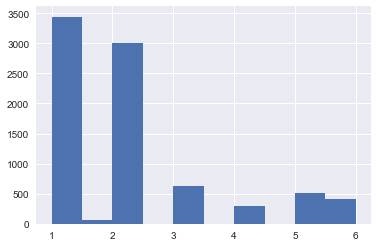

In [139]:
df.goal.hist()

In [6]:
df = df.to_csv('dating_data.csv')

NameError: name 'df' is not defined

In [2]:
from __future__ import print_function, division

# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as pd_sql

# We are also going to do some basic viz
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:

connection_args = {
    'host': '54.193.25.78', # You'll have to update this to your IP
    'user': 'ubuntu',    # username
    'dbname': 'dating',   # DB that we are connecting to
    'port': 5432         # port we opened on AWS
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)

In [11]:
query = """
Select * from dating_data;
"""

pd_sql.read_sql(query, connection)

""


In [12]:
df.columns

NameError: name 'df' is not defined